In [124]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

### 1.1 data load

In [125]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
# pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

In [126]:
data = pd.read_csv('data_cleaned.csv')
# index_col = 0

In [127]:
data

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Nan,race_Other,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diag_1_Circulatory,diag_1_Congenital,diag_1_Diabetes,diag_1_Digestive,diag_1_Endocrine_Immunity,diag_1_Generalized_Symptoms,diag_1_Genitourinary,diag_1_Infectious,diag_1_Injury_Poison,diag_1_Mental_Disorders,diag_1_Muscles_Skeleton,diag_1_Neoplasms,diag_1_Nervous_System,diag_1_Pregnancy,diag_1_Respiratory,diag_1_Skin,diag_1_Supplementary,diag_2_Circulatory,diag_2_Congenital,diag_2_Diabetes,diag_2_Digestive,diag_2_Endocrine_Immunity,diag_2_Generalized_Symptoms,diag_2_Genitourinary,diag_2_Infectious,diag_2_Injury_Poison,diag_2_Mental_Disorders,diag_2_Muscles_Skeleton,diag_2_Neoplasms,diag_2_Nervous_System,diag_2_Pregnancy,diag_2_Respiratory,diag_2_Skin,diag_2_Supplementary,diag_3_Circulatory,diag_3_Congenital,diag_3_Diabetes,diag_3_Digestive,diag_3_Endocrine_Immunity,diag_3_Generalized_Symptoms,diag_3_Genitourinary,diag_3_Infectious,diag_3_Injury_Poison,diag_3_Mental_Disorders,diag_3_Muscles_Skeleton,diag_3_Neoplasms,diag_3_Nervous_System,diag_3_Pregnancy,diag_3_Respiratory,diag_3_Skin,diag_3_Supplementary,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm
0,0,0,1,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,10,3,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,20,2,11,5,13,2,0,1,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
3,1,30,2,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,40,1,51,0,8,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,

### 1.2 check correlation 

In [128]:
corr_matrix = data.corr()
corr_matrix

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesMed,readmitted,race_Asian,race_Caucasian,race_Hispanic,race_Nan,race_Other,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,diag_1_Circulatory,diag_1_Congenital,diag_1_Diabetes,diag_1_Digestive,diag_1_Endocrine_Immunity,diag_1_Generalized_Symptoms,diag_1_Genitourinary,diag_1_Infectious,diag_1_Injury_Poison,diag_1_Mental_Disorders,diag_1_Muscles_Skeleton,diag_1_Neoplasms,diag_1_Nervous_System,diag_1_Pregnancy,diag_1_Respiratory,diag_1_Skin,diag_1_Supplementary,diag_2_Circulatory,diag_2_Congenital,diag_2_Diabetes,diag_2_Digestive,diag_2_Endocrine_Immunity,diag_2_Generalized_Symptoms,diag_2_Genitourinary,diag_2_Infectious,diag_2_Injury_Poison,diag_2_Mental_Disorders,diag_2_Muscles_Skeleton,diag_2_Neoplasms,diag_2_Nervous_System,diag_2_Pregnancy,diag_2_Respiratory,diag_2_Skin,diag_2_Supplementary,diag_3_Circulatory,diag_3_Congenital,diag_3_Diabetes,diag_3_Digestive,diag_3_Endocrine_Immunity,diag_3_Generalized_Symptoms,diag_3_Genitourinary,diag_3_Infectious,diag_3_Injury_Poison,diag_3_Mental_Disorders,diag_3_Muscles_Skeleton,diag_3_Neoplasms,diag_3_Nervous_System,diag_3_Pregnancy,diag_3_Respiratory,diag_3_Skin,diag_3_Supplementary,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm
gender,1.000000,-0.052986,-0.024449,0.004577,0.065921,-0.012625,-0.014849,-0.020391,-0.001022,-0.003042,0.004065,-0.003051,-0.004147,0.002915,-0.002278,-0.003520,0.027095,0.034111,0.001904,0.010698,0.011916,0.007375,0.001069,0.006925,0.004055,NaN,NaN,0.001864,0.000994,0.004895,NaN,0.005654,-0.003520,0.018572,0.019109,-0.002291,0.004473,0.057122,-0.000878,0.009208,0.007559,0.005842,0.008511,0.004476,-0.002923,0.010552,0.003556,-0.004529,0.029917,-0.080285,-0.015676,-0.005632,-0.016354,0.024420,0.007765,-0.005549,-0.002484,0.004784,0.005654,0.000322,0.006925,-0.001983,0.002402,-0.019975,-0.003148,-0.005573,0.001551,0.006925,0.005440,0.011171,0.009856,0.006754,-0.025020,-0.017218,-0.004848,0.007339,0.000400,-0.000789,-0.003520,0.003998,0.000338,0.009513,0.004489,0.000478,-0.004979,0.072028,0.004467,0.032936,-0.008611,-0.030260,-0.021359,-0.026222,-0.003113,-0.021273,-0.005865,-0.020637,-0.001150,-0.007132,-0.085573,-0.013356,0.012573,0.001583,0.042777,-0.001538,-0.013750,-0.009379,-0.023221,0.007340,-0.037223,0.000083,0.005183,0.017686,-0.016403,0.006318,0.001174,-0.066307,0.006293,0.030217,-0.003775,0.027775,-0.003191,-0.008575,-0.011460,-0.018592,0.002812,-0.018840,-0.006771,0.010852,0.011928,-0.016866,0.007318,-0.005734,-0.058

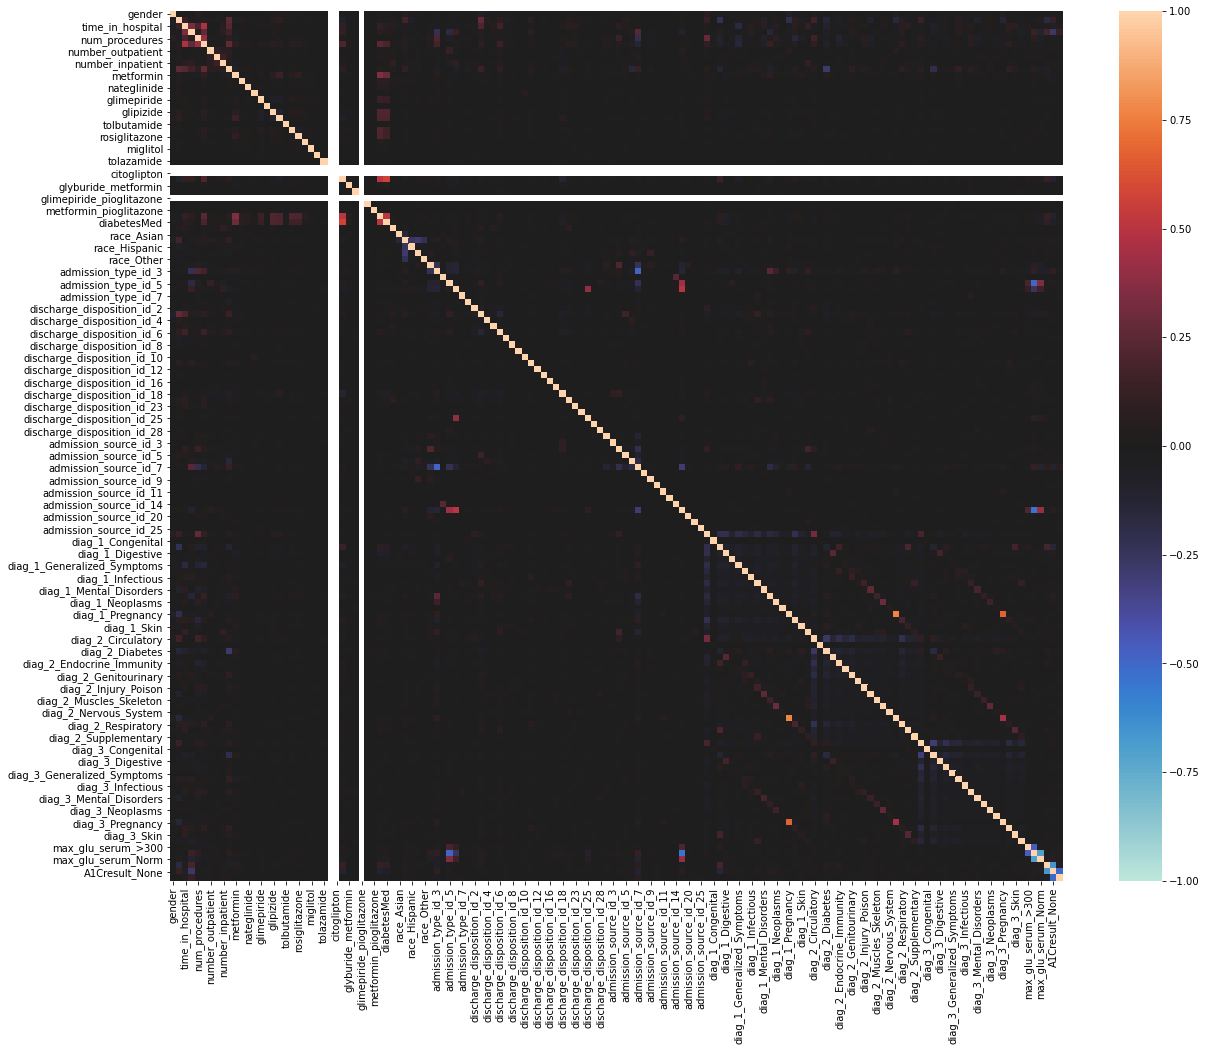

In [129]:
fig=plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center= 0)

#### 2. Modeling

#### 2.1 Train, Test set split

In [130]:
# stdsc = StandardScaler()
# train/testset split

In [131]:
# split train /test set

In [132]:
X = data.drop (['readmitted'], axis=1)
y = data['readmitted']

In [133]:
np.bincount(y) # 0: no, 0: >30, 1:<30

array([64770,  6277], dtype=int64)

In [134]:
y_train.value_counts() / len(y_train) * 100

0    91.164206
1     8.835794
Name: readmitted, dtype: float64

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [137]:
## standard scaler:: 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###  2.2 Modeling

#### 2.2.1 Logistic regression modeling

In [158]:
logistic = LogisticRegression(solver='liblinear',
                              penalty='l2',
                              C=0.01,
                              random_state=1)

logistic.fit(X_train, y_train)
# class_weight = 'balanced'

LogisticRegression(C=0.01, random_state=1, solver='liblinear')

In [138]:
# logistic = LogisticRegression()

# logistic.fit(X_train, y_train)

LogisticRegression()

In [159]:
from sklearn.linear_model import LogisticRegression
y_pred = logistic.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],12947,8
True[1],1251,4


In [156]:
print('error: %d' % (y_test != y_pred).sum())
print('accuracy_score: %.3f' % accuracy_score(y_test, y_pred))
print('precision_score: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('recall_score: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('f1_score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

# imbalanced라서.. 1 에 해당하는 recall 과 f1 score가 낮음..
# 모델.. 랜덤 포레스트..

error: 1259
accuracy_score: 0.911
precision_score: 0.333
recall_score: 0.003
f1_score: 0.006


In [23]:
from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_test, logistic_function(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:, 1])

In [24]:
fpr, tpr, thresholds

(array([0.00000000e+00, 7.71902740e-05, 7.71902740e-05, ...,
        9.98379004e-01, 9.98379004e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 7.96812749e-04, ...,
        9.99203187e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99713075, 0.99713075, 0.96999493, ..., 0.34435798, 0.34408151,
        0.32099904]))

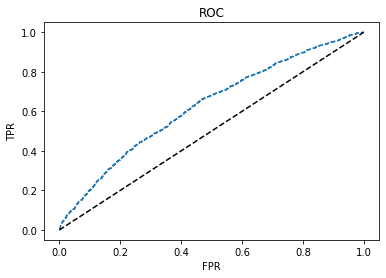

In [25]:
# fpr, tpr, thresholds = roc_curve(y_test, Logistic recision_function(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, '--', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [160]:
from sklearn.model_selection import cross_validate 
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV 
pipe_logistic = make_pipeline(LogisticRegression(random_state=1))
param_range = [0.01, 0.1, 1.0, 10, 100, 200] 

param_grid = [{'logisticregression__C': param_range}] 

gs = GridSearchCV(estimator=pipe_logistic,
                  param_grid=param_grid, 
                  scoring='roc_auc', 
                  cv=3,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

# 로지스틱.. 맞지않는듯..

0.6282286381287352
{'logisticregression__C': 200}


### 2.2.2. decision tree modeling

#### 2.2.2.1 fit to tree model

In [161]:
tree = DecisionTreeClassifier(criterion='gini', max_depth= 5, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [162]:
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [163]:
y_pred_p = tree.predict_proba(X_test)
y_pred_p

array([[0.9321958 , 0.0678042 ],
       [0.9321958 , 0.0678042 ],
       [0.9321958 , 0.0678042 ],
       ...,
       [0.85901926, 0.14098074],
       [0.9321958 , 0.0678042 ],
       [0.9321958 , 0.0678042 ]])

In [170]:
param_range = [-1, 3, 5, 10, 15, 30] 

param_grid = {'max_depth': param_range}

gs = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=3)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)



0.9115013131875659
{'max_depth': 3}


In [172]:
y_pred = gs.predict(X_test)

In [174]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],12954,1
True[1],1255,0


In [173]:
print('error: %d' % (y_test != y_pred).sum())
print('accuracy_score: %.3f' % accuracy_score(y_test, y_pred))
print('precision_score: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('recall_score: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('f1_score: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

error: 1256
accuracy_score: 0.912
precision_score: 0.000
recall_score: 0.000
f1_score: 0.000


#### 2.2.2.2 check prediction score

In [164]:
tree.score(X_test, y_test)

0.9116819141449684

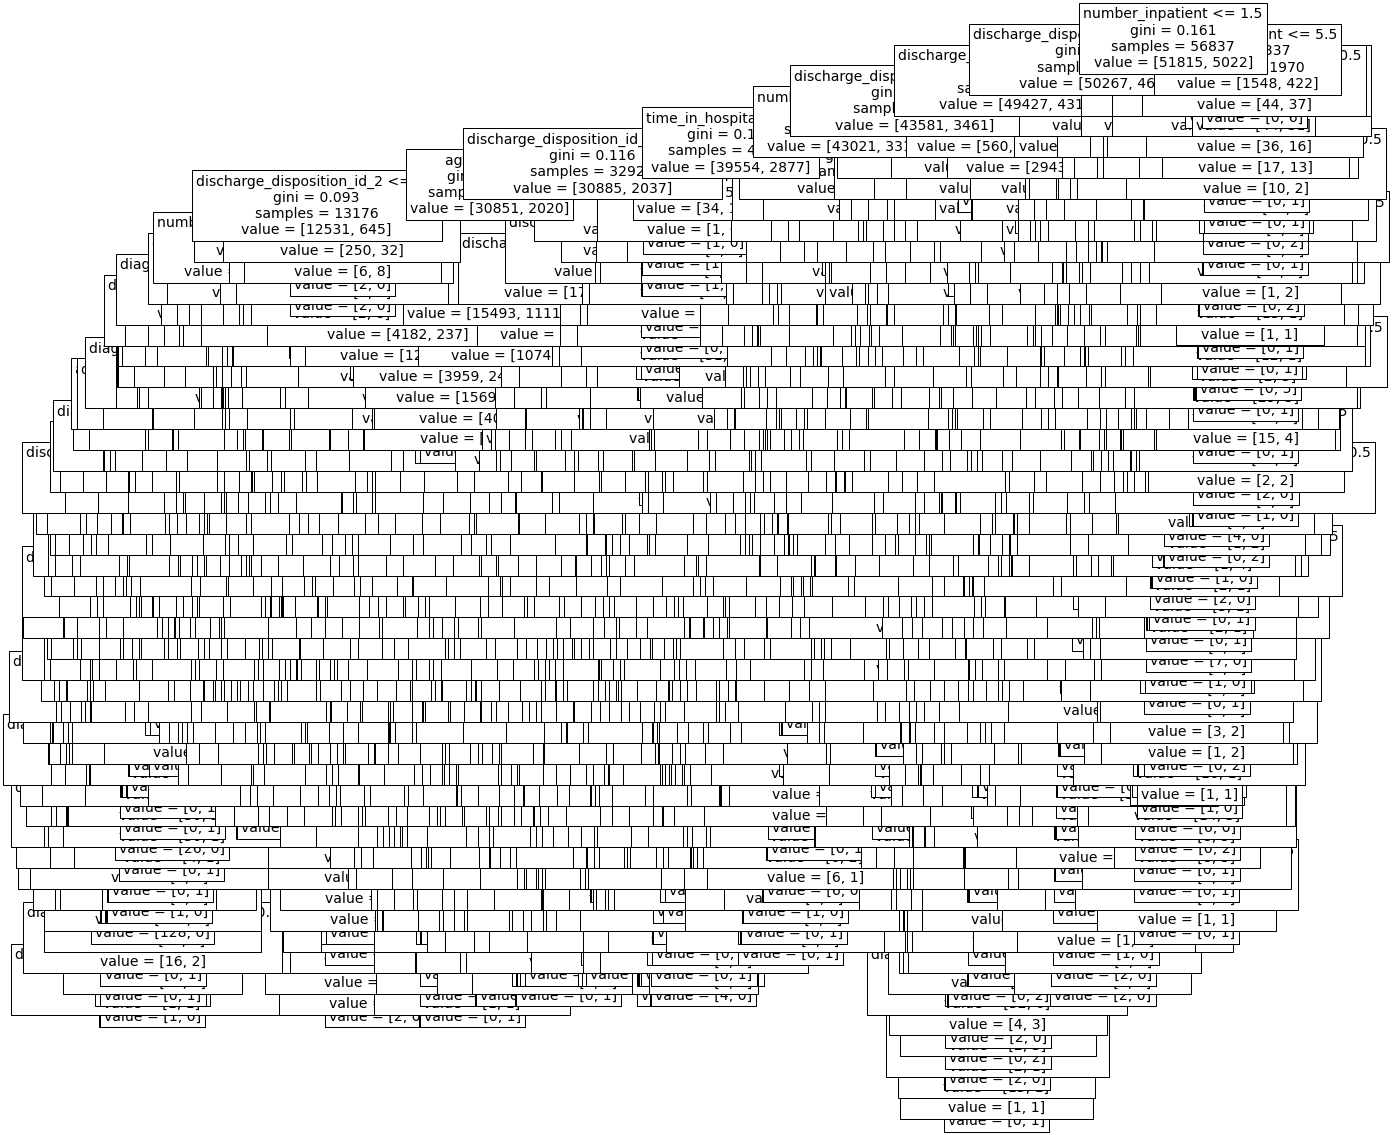

In [50]:
from sklearn.tree import plot_tree
# feature_names=X.column.tolist()
plt.figure(figsize=(20,20))
plot_tree(tree, feature_names=X.columns, fontsize=14)
plt.show()

#### 2.2.2.3 check confusion matrix  : accuracy, precision, recall, F1, 

In [165]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],12951,4
True[1],1251,4


In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
print('error %d' % (y_test != y_pred).sum())
print('accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

error 1255
accuracy: 0.912
precision: 0.500
recall: 0.003
F1: 0.006


#### 2.2.2.4 Check ROC

In [53]:
from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_test, tree.decision_function(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])

In [54]:
fpr, tpr, thresholds

(array([0.        , 0.09494404, 1.        ]),
 array([0.        , 0.12191235, 1.        ]),
 array([2., 1., 0.]))

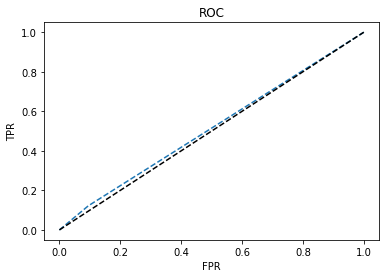

In [55]:
plt.plot(fpr, tpr, '--', label="Tree Model")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

#### 2.2.2.5 Check cross validation

In [167]:
scores = cross_validate(estimator=tree, 
                        X=X_train, 
                        y=y_train, 
                        scoring=['accuracy'], 
                        cv=10, 
                        n_jobs=-1,
                        return_train_score=False)
print('CV test_accuracy score : %s' % scores['test_accuracy'])
print('CV test_accuracy mean & std : %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), 
                                 np.std(scores['test_accuracy'])))

CV test_accuracy score : [0.91150598 0.91115412 0.91185785 0.91045039 0.91062632 0.91115412
 0.90957072 0.91096252 0.91113848 0.91131445]
CV test_accuracy mean & std : 0.911 +/- 0.001


#### 2.2.2.6 creating pipeline

In [59]:
pipe_tree = make_pipeline(DecisionTreeClassifier())

In [60]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

#### 2.2.2.7 Check learning Curv

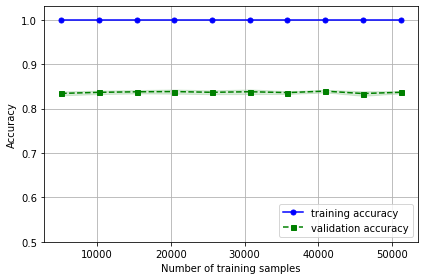

In [61]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_tree,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()

#### 2.2.2.7 check overfitting, underfitting

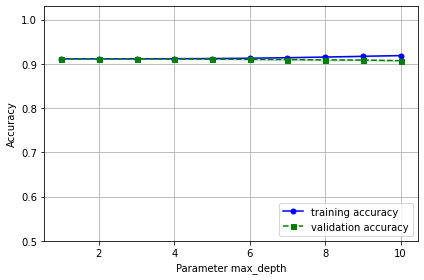

In [68]:
param_range = [1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
                estimator=pipe_tree, 
                X=X_train, 
                y=y_train, 
                param_name='decisiontreeclassifier__max_depth', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth') 
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth') 
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.03]) 
plt.tight_layout()
plt.show()


#### 2.2.2.8 Tuning high parameter 

In [69]:
param_range1 = [1,2,3,4,5,6,7,8,9,10] 
param_range2 = [10,20,30,40,50] 

param_grid = [{'decisiontreeclassifier__max_depth': param_range1, 
               'decisiontreeclassifier__min_samples_leaf': param_range2}] 

gs = GridSearchCV(estimator=pipe_tree, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.9116772519197781
{'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 20}


#### 2.2.2.9 Evaluation tree model

In [ ]:
# fpr, tpr, thresholds = roc_curve(y_test, tree.decision_function(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])

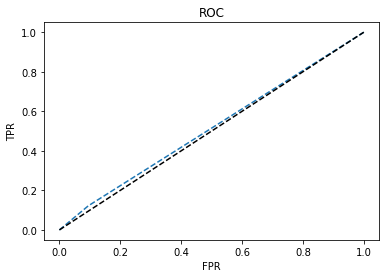

In [72]:
plt.plot(fpr, tpr, '--', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

### 2.2.3 Random Forest

#### 2.2.3.1 Modeling

In [182]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500, 
                                random_state=1,
                               max_depth = 5)

In [183]:
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=1)

In [194]:
y_pred = forest.predict(X_test)

In [186]:
y_pred

array([0.06802722, 0.06528533, 0.06762686, ..., 0.14230673, 0.06523359,
       0.06913349])

In [191]:
# y_pred = [1 for i in y_pred if i > 0.2  else 0 ]

SyntaxError: invalid syntax (<ipython-input-191-5736b1a8e74a>, line 1)

In [199]:
def pred(x):
    if x > 0.1:
        return 1
    else:
        return 0

In [202]:
y_pred = pd.Series(y_pred).apply(pred)

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87     12955
           1       0.16      0.37      0.22      1255

    accuracy                           0.77     14210
   macro avg       0.54      0.59      0.54     14210
weighted avg       0.86      0.77      0.81     14210



#### 2.2.3.2 Check ACU

In [ ]:
#### 2.2.3.3 Check ROC

In [ ]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

In [ ]:
# check confusion matrix 

In [ ]:
forest.fit(X_train, y_train)

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

#### 2.2.3.3 Fearure importance

 1) number_inpatient               0.253984
 2) discharge_disposition_id_22    0.182723
 3) discharge_disposition_id_3     0.103094
 4) discharge_disposition_id_5     0.065331
 5) number_diagnoses               0.035842
 6) num_lab_procedures             0.032587
 7) num_medications                0.032312
 8) age                            0.026442
 9) time_in_hospital               0.023456
10) admission_type_id_6            0.021881
11) num_procedures                 0.015886
12) discharge_disposition_id_2     0.015873
13) diag_2_Diabetes                0.013119
14) discharge_disposition_id_28    0.009917
15) admission_type_id_2            0.009679
16) admission_source_id_7          0.007842
17) diag_2_Nervous_System          0.007812
18) diag_1_Supplementary           0.007457
19) discharge_disposition_id_15    0.006866
20) admission_type_id_3            0.006708
21) number_outpatient              0.006538
22) change                         0.005384
23) number_emergency            

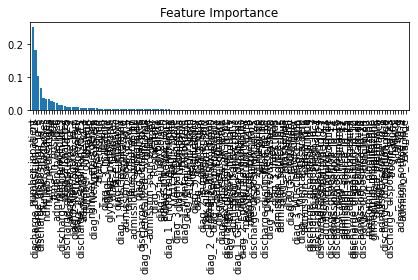

In [204]:
feat_labels = X.columns

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()